In [2]:
import sys, os, distutils.core
sys.path.insert(0, os.path.abspath('../../../detectron2'))
sys.path.insert(0, os.path.abspath('../../../'))
sys.path.insert(0, os.path.abspath('.'))
os.environ['DETECTRON2_DATASETS'] = '/home/wlli/Data/datasets/'

from detectron2.data import DatasetCatalog, MetadataCatalog
from oneformer.data.datasets.register_yeast_panoptic_annos_semseg import register_all_yeast_panoptic_annos_sem_seg
from tqdm import trange

In [3]:
from detectron2.config import get_cfg
from detectron2.projects.panoptic_deeplab import (
    PanopticDeeplabDatasetMapper,
    add_panoptic_deeplab_config,
)
from detectron2.engine import default_setup
from detectron2.engine import DefaultPredictor
from prediction import Predictor
from google.colab.patches import cv2_imshow
import os, json, cv2, random
from detectron2.utils.visualizer import Visualizer
import torch

In [4]:
# torch.get_num_threads()
# torch.set_num_threads(8)


In [5]:
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:8700m"
cfg = get_cfg()
add_panoptic_deeplab_config(cfg)
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file("/home/wlli/Data/oneformer_output/config.yaml")

cfg.MODEL.DEVICE = "cpu"
# into cpu model
cfg.MODEL.SEM_SEG_HEAD.NORM = "BN"
cfg.MODEL.INS_EMBED_HEAD.NORM = "BN"
cfg.MODEL.RESNETS.NORM = "BN"

# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = os.path.abspath("/home/wlli/Data/oneformer_output/model_0059999.pth")
# cfg.MODEL.WEIGHTS = "detectron2://DeepLab/R-52.pkl"
# cfg.INPUT.MIN_SIZE_TEST = 512
# cfg.INPUT.MAX_SIZE_TRAIN = 2048

In [6]:
from skimage.io import imread, imsave
import numpy as np
from pathlib import Path

In [7]:
predictor = Predictor(cfg)

In [10]:
movie_path_list = list(Path("/home/wlli/Data/raw/20240503_yav2105_2105_amp_02_nikon/").rglob("*_rigid__.tif"))
movie_path_list = [str(x) for x in movie_path_list]
movie_path_list.sort()
movie_path_list = movie_path_list[5:]
movie_path_list

['/home/wlli/Data/raw/20240503_yav2105_2105_amp_02_nikon/06_2104_2105-04_rigid__.tif',
 '/home/wlli/Data/raw/20240503_yav2105_2105_amp_02_nikon/07_2104_2105-03_rigid__.tif',
 '/home/wlli/Data/raw/20240503_yav2105_2105_amp_02_nikon/08_2104_2105-02_rigid__.tif',
 '/home/wlli/Data/raw/20240503_yav2105_2105_amp_02_nikon/09_2104_2105-01_rigid__.tif']

In [11]:
for movie_path in movie_path_list:
    print(movie_path)
    movie = imread(movie_path)
    for frame in trange(0, movie.shape[0]):
        image = movie[frame,:,:,0]
        image = image - image.min()
        image = image / image.max()
        image = (image * 255).astype(np.uint8)
        im = np.stack((image,)*3, axis=-1)
        prediction_output = predictor(im)
        panoptic_seg, _ = prediction_output["panoptic_seg"]
        movie[frame,:,:,-1] = np.array(panoptic_seg)
    
    # imsave(movie_path, movie)
    movie = np.moveaxis(movie, -1, 1)
    imsave(movie_path, movie, imagej=True)

/home/wlli/Data/raw/20240503_yav2105_2105_amp_02_nikon/06_2104_2105-04_rigid__.tif


  0%|                                                   | 0/193 [00:00<?, ?it/s]/home/wlli/miniconda3/envs/oneformer/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1643078422371/work/aten/src/ATen/native/TensorShape.cpp:2156.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|███████████████████████████████████████| 193/193 [5:01:45<00:00, 93.81s/it]
/home/wlli/miniconda3/envs/oneformer/lib/python3.8/site-packages/tifffile/tifffile.py:3375: UserWarning: <tifffile.TiffWriter '06_2104_2105-04_rigid__.tif'> truncating ImageJ file
  warnings.warn(


/home/wlli/Data/raw/20240503_yav2105_2105_amp_02_nikon/07_2104_2105-03_rigid__.tif


100%|███████████████████████████████████████| 193/193 [5:03:32<00:00, 94.37s/it]
/home/wlli/miniconda3/envs/oneformer/lib/python3.8/site-packages/tifffile/tifffile.py:3375: UserWarning: <tifffile.TiffWriter '07_2104_2105-03_rigid__.tif'> truncating ImageJ file
  warnings.warn(


/home/wlli/Data/raw/20240503_yav2105_2105_amp_02_nikon/08_2104_2105-02_rigid__.tif


100%|███████████████████████████████████████| 193/193 [5:04:44<00:00, 94.74s/it]
/home/wlli/miniconda3/envs/oneformer/lib/python3.8/site-packages/tifffile/tifffile.py:3375: UserWarning: <tifffile.TiffWriter '08_2104_2105-02_rigid__.tif'> truncating ImageJ file
  warnings.warn(


/home/wlli/Data/raw/20240503_yav2105_2105_amp_02_nikon/09_2104_2105-01_rigid__.tif


100%|███████████████████████████████████████| 193/193 [4:47:20<00:00, 89.33s/it]
/home/wlli/miniconda3/envs/oneformer/lib/python3.8/site-packages/tifffile/tifffile.py:3375: UserWarning: <tifffile.TiffWriter '09_2104_2105-01_rigid__.tif'> truncating ImageJ file
  warnings.warn(


In [11]:
movie = np.moveaxis(movie, -1, 1)
imsave(movie_path, movie, imagej=True)

/home/wlli/miniconda3/envs/oneformer/lib/python3.8/site-packages/tifffile/tifffile.py:3375: UserWarning: <tifffile.TiffWriter '01_2104_2105-09_rigid__.tif'> truncating ImageJ file
  warnings.warn(


In [17]:
prediction_output = predictor(im)
print(prediction_output.keys())

/home/liwa/miniconda3/envs/oneformer/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180588308/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


dict_keys(['sem_seg', 'center', 'offset', 'panoptic_seg', 'instances'])


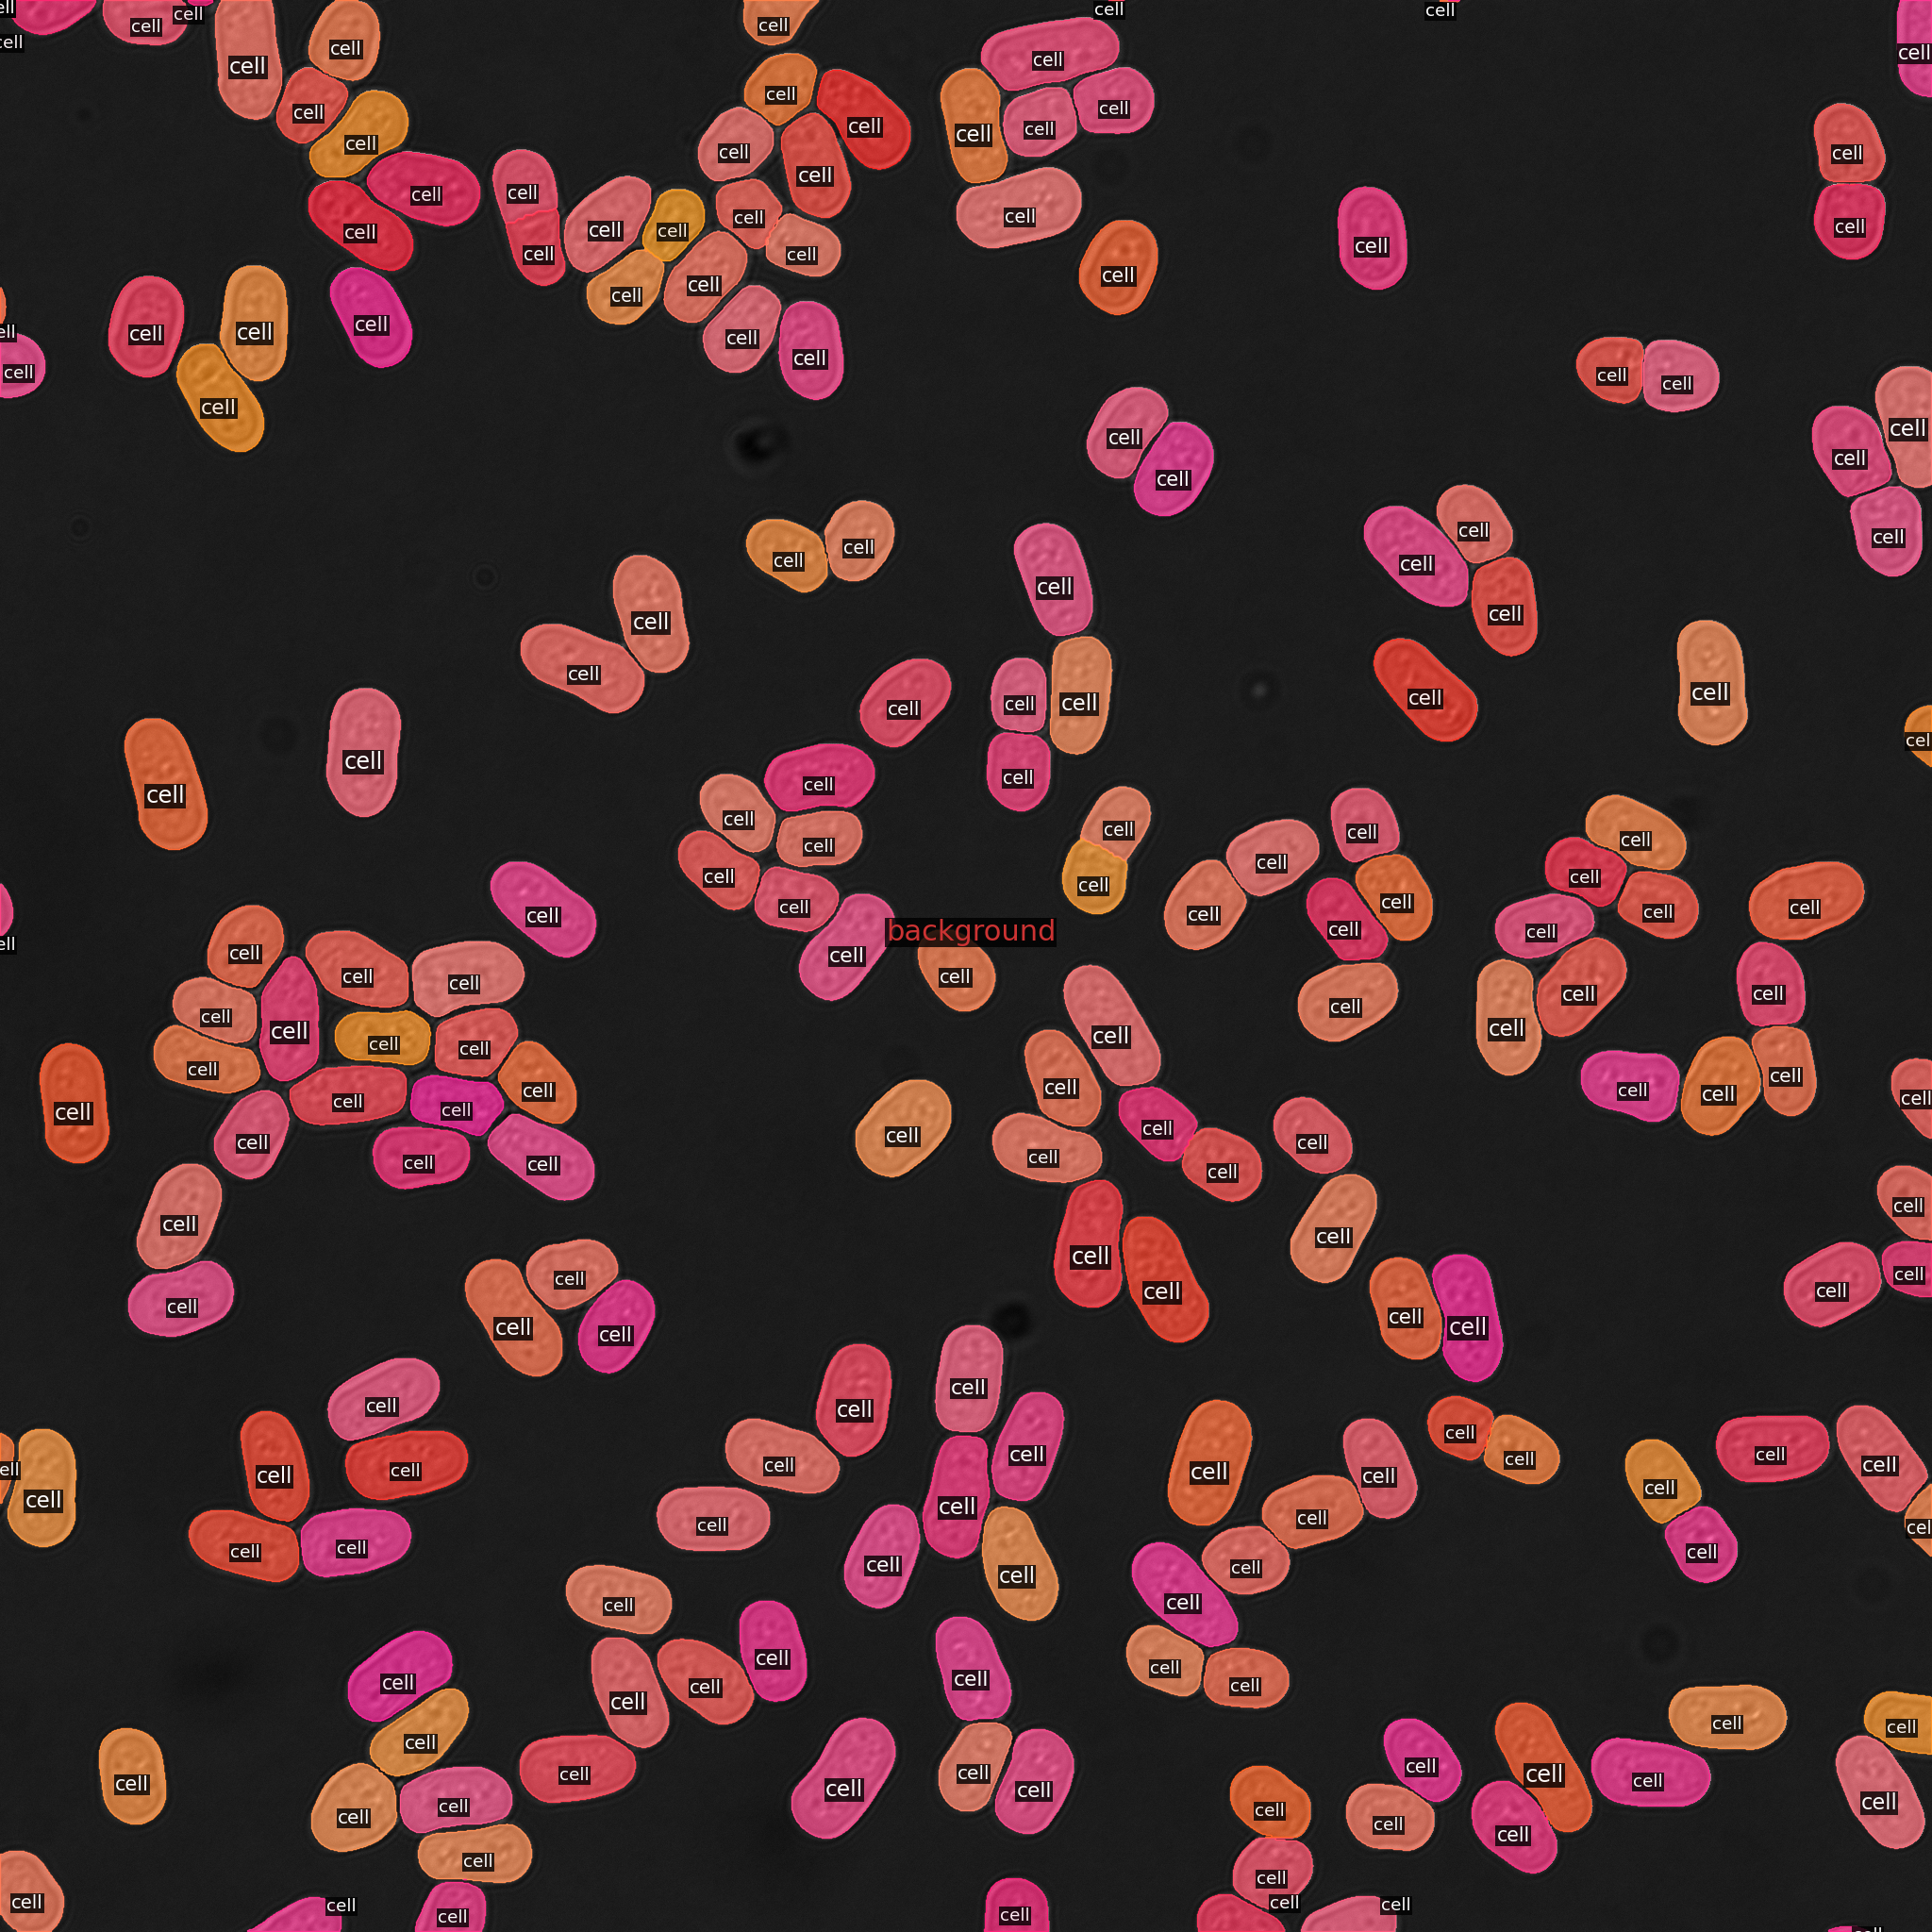

In [18]:
panoptic_seg, segments_info = prediction_output["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])

In [20]:
panoptic_seg.shape

torch.Size([2048, 2048])